<a href="https://colab.research.google.com/github/Darkdriller/Sem3PythonProject/blob/main/FinalPythonProject.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import scipy.stats as st
import pandas as pd
import matplotlib.pyplot as plt
import io
import math
from scipy.stats import binom
from scipy.stats import norm
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
url3="https://raw.githubusercontent.com/Darkdriller/datasets/main/house.csv"
url2="https://raw.githubusercontent.com/Darkdriller/datasets/main/MagicBricks.csv"
url1="https://raw.githubusercontent.com/Darkdriller/datasets/main/Mumbai1.csv"

In [2]:
#all model training
def get_corelation(df,label):
  data_corr =df.select_dtypes(include=[np.number])
  data_corr.head()
  corr = data_corr.corr()
  corr.head(50)
  corr.sort_values([label], ascending=False, inplace=True)
  ax=sns.heatmap(corr)
  return (corr[label])
 


In [3]:
def train_test_split_selected_attributes(df,pricelabel,wantedlabels=[]):
  Y=df[pricelabel]
  X=df[wantedlabels]
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
  return X_train, X_test, y_train, y_test

In [4]:
def train_test_split_all_attributes(df,pricelabel,unwantedlabels=[]):
  Y=df[pricelabel]
  unwantedlabels.append(pricelabel)
  X=df.drop(unwantedlabels,axis=1).select_dtypes(include=[np.number])
  X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size = 0.25)
  return X_train, X_test, y_train, y_test

In [5]:
def lin_reg(X_train, X_test, y_train, y_test):
  reg=LinearRegression()
  reg.fit(X_train , y_train)
  return reg.score(X_test , y_test)


In [6]:
def rand_forest_generator(X_train, X_test, y_train, y_test):
  rf = RandomForestRegressor(random_state = 42)
  rf.fit(X_train, y_train)
  return rf.score(X_test,y_test)

In [7]:
# def rand_forest_tuned_parameter(X_train, X_test, y_train, y_test):
#   rf = RandomForestRegressor(random_state = 42)
#   random_grid = { 
#       'n_estimators': [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)],
#       'max_features': ['auto', 'sqrt', 'log2'],
#       'max_depth' : [6,7,8,9,10],
#       'min_samples_split' : [2, 5, 10],
#       'min_samples_leaf' : [1, 2, 4]
#   }
#   rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 5, verbose=2, random_state=42, n_jobs = -1)
#   rf_random.fit(X_train, y_train)
#   print(rf_random.best_params_)
#   return (rf_random.best_score_)

In [8]:
def GBR(X_train, X_test, y_train, y_test):
  gbr = GradientBoostingRegressor(n_estimators=3000, learning_rate=0.05,max_depth=4, max_features='sqrt', min_samples_leaf=15, min_samples_split=10, loss='huber')
  gbr.fit(X_train, y_train)
  return gbr.score(X_test,y_test)

In [9]:
#global var
result={}

In [10]:
#Dataset_1
df = pd.read_csv(url1)
df

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,Kharghar,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,Kharghar,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,Kharghar,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,Kharghar,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,Shirgaon,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,Thane West,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,Thane West,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,Boisar,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [11]:
le = preprocessing.LabelEncoder()
location=le.fit_transform(df['Location'])
label_mapping = {i: l for i, l in enumerate(le.classes_)}
df["Location"]=location
pricelabel="Price"
df

,Unnamed: 0,Price,Area,Location,No. of Bedrooms,New/Resale,Gymnasium,Lift Available,Car Parking,Maintenance Staff,24x7 Security,Children's Play Area,Clubhouse,Intercom,Landscaped Gardens,Indoor Games,Gas Connection,Jogging Track,Swimming Pool
0,0,4850000,720,136,1,0,0,1,1,1,1,0,0,0,0,0,0,0,0
1,1,4500000,600,136,1,0,1,1,1,1,1,0,1,0,0,0,0,1,1
2,2,6700000,650,136,1,0,1,1,1,1,1,1,1,1,0,0,0,1,1
3,3,4500000,650,136,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
4,4,5000000,665,136,1,0,0,1,1,1,1,0,0,1,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6342,6342,2485000,700,320,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0
6343,6343,14500000,900,342,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6344,6344,14500000,900,342,2,0,0,1,0,0,0,0,0,1,0,0,1,0,0
6345,6345,4100000,1380,36,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0


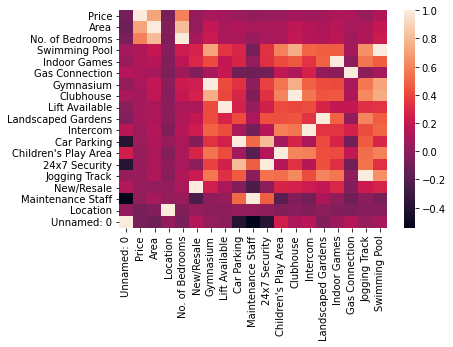

In [12]:
cor_data_1=get_corelation(df,pricelabel)

In [13]:
wanted=cor_data_1.keys().tolist()

In [14]:
unwanted=["Unnamed: 0"]
# wanted=["Area", "No. of Bedrooms", "Swimming Pool","Indoor Games","Gas Connection","Gymnasium","Clubhouse","Lift Available","Landscaped Gardens","Intercom"]
wanted=cor_data_1.keys().tolist()[1:11]
result['select_lin_1']=[]
result['select_rand_frst_1']=[]
result['select_GBR_1']=[]
result['all_lin_1']=[]
result['all_rand_frst_1']=[]
result['all_GBR_1']=[]
result['select_lin_2']=[]
result['select_rand_frst_2']=[]
result['select_GBR_2']=[]
result['all_lin_2']=[]
result['all_rand_frst_2']=[]
result['all_GBR_2']=[]
result['select_lin_3']=[]
result['select_rand_frst_3']=[]
result['select_GBR_3']=[]
result['all_lin_3']=[]
result['all_rand_frst_3']=[]
result['all_GBR_3']=[]
wanted

['Area',
 'No. of Bedrooms',
 'Swimming Pool',
 'Indoor Games',
 'Gas Connection',
 'Gymnasium',
 'Clubhouse',
 'Lift Available',
 'Landscaped Gardens',
 'Intercom']

In [15]:
for i in range(10):
  X_train, X_test, y_train, y_test=train_test_split_selected_attributes(df,pricelabel,wanted)
  result['select_lin_1'].append(lin_reg(X_train, X_test, y_train, y_test))
  result['select_rand_frst_1'].append(rand_forest_generator(X_train, X_test, y_train, y_test))
  result['select_GBR_1'].append(GBR(X_train, X_test, y_train, y_test))
  X_train, X_test, y_train, y_test=train_test_split_all_attributes(df,pricelabel,unwanted)
  result['all_lin_1'].append(lin_reg(X_train, X_test, y_train, y_test))
  result['all_rand_frst_1'].append(rand_forest_generator(X_train, X_test, y_train, y_test))
  result['all_GBR_1'].append(GBR(X_train, X_test, y_train, y_test))

**DATASET 2**

In [16]:
#datset 2
df1 = pd.read_csv(url2)
df1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
0,800.0,3,2.0,Semi-Furnished,Rohini Sector 25,1.0,6500000,Ready_to_move,New_Property,Builder_Floor,NaN
1,750.0,2,2.0,Semi-Furnished,"J R Designers Floors, Rohini Sector 24",1.0,5000000,Ready_to_move,New_Property,Apartment,6667.0
2,950.0,2,2.0,Furnished,"Citizen Apartment, Rohini Sector 13",1.0,15500000,Ready_to_move,Resale,Apartment,6667.0
3,600.0,2,2.0,Semi-Furnished,Rohini Sector 24,1.0,4200000,Ready_to_move,Resale,Builder_Floor,6667.0
4,650.0,2,2.0,Semi-Furnished,Rohini Sector 24 carpet area 650 sqft status R...,1.0,6200000,Ready_to_move,New_Property,Builder_Floor,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,Unfurnished,Chittaranjan Park,3.0,55000000,Ready_to_move,New_Property,Builder_Floor,12916.0
1255,1050.0,3,2.0,Semi-Furnished,Chittaranjan Park,3.0,12500000,Ready_to_move,Resale,Builder_Floor,12916.0
1256,875.0,3,3.0,Semi-Furnished,Chittaranjan Park,3.0,17500000,Ready_to_move,New_Property,Builder_Floor,12916.0
1257,990.0,2,2.0,Unfurnished,Chittaranjan Park Block A,1.0,11500000,Ready_to_move,Resale,Builder_Floor,12916.0


In [17]:
le = preprocessing.LabelEncoder()
Furnishing=le.fit_transform(df1['Furnishing'])
Locality=le.fit_transform(df1['Locality'])
Status=le.fit_transform(df1['Status'])
Transaction=le.fit_transform(df1['Transaction'])
Type=le.fit_transform(df1['Type'])
df1['Furnishing']=Furnishing
df1['Locality']=Locality
df1['Status']=Status
df1['Transaction']=Transaction
df1['Type']=Type
df1=df1.dropna()

In [18]:
df1

,Area,BHK,Bathroom,Furnishing,Locality,Parking,Price,Status,Transaction,Type,Per_Sqft
1,750.0,2,2.0,1,139,1.0,5000000,1,0,0,6667.0
2,950.0,2,2.0,0,49,1.0,15500000,1,1,0,6667.0
3,600.0,2,2.0,1,281,1.0,4200000,1,1,1,6667.0
4,650.0,2,2.0,1,282,1.0,6200000,1,0,1,6667.0
5,1300.0,4,3.0,1,281,1.0,15500000,1,0,1,6667.0
...,...,...,...,...,...,...,...,...,...,...,...
1254,4118.0,4,5.0,2,44,3.0,55000000,1,0,1,12916.0
1255,1050.0,3,2.0,1,44,3.0,12500000,1,1,1,12916.0
1256,875.0,3,3.0,1,44,3.0,17500000,1,0,1,12916.0
1257,990.0,2,2.0,2,45,1.0,11500000,1,1,1,12916.0


Price          1.000000
Bathroom       0.732241
BHK            0.599587
Area           0.574410
Per_Sqft       0.325240
Type           0.105376
Locality       0.046358
Parking        0.035894
Furnishing     0.008934
Status        -0.192469
Transaction   -0.214012
Name: Price, dtype: float64

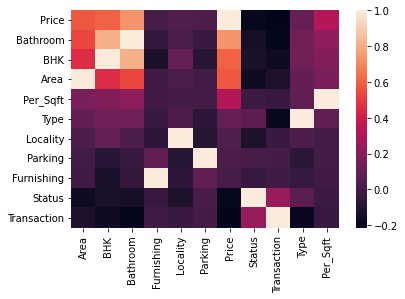

In [19]:
cor_data_2=get_corelation(df1,pricelabel)
cor_data_2

In [20]:
wanted=cor_data_2.keys().tolist()[1:]
for i in range(10):
  X_train, X_test, y_train, y_test=train_test_split_selected_attributes(df1,pricelabel,wanted)
  result['select_lin_2'].append(lin_reg(X_train, X_test, y_train, y_test))
  result['select_rand_frst_2'].append(rand_forest_generator(X_train, X_test, y_train, y_test))
  result['select_GBR_2'].append(GBR(X_train, X_test, y_train, y_test))
  X_train, X_test, y_train, y_test=train_test_split_all_attributes(df1,pricelabel,[])
  result['all_lin_2'].append(lin_reg(X_train, X_test, y_train, y_test))
  result['all_rand_frst_2'].append(rand_forest_generator(X_train, X_test, y_train, y_test))
  result['all_GBR_2'].append(GBR(X_train, X_test, y_train, y_test))


**DATASET 3**

In [21]:
df2 = pd.read_csv(url3)
df2

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
21608,263000018,20140521T000000,360000.0,3,2.50,1530,1131,3.0,0,0,3,8,1530,0,2009,0,98103,47.6993,-122.346,1530,1509
21609,6600060120,20150223T000000,400000.0,4,2.50,2310,5813,2.0,0,0,3,8,2310,0,2014,0,98146,47.5107,-122.362,1830,7200
21610,1523300141,20140623T000000,402101.0,2,0.75,1020,1350,2.0,0,0,3,7,1020,0,2009,0,98144,47.5944,-122.299,1020,2007
21611,291310100,20150116T000000,400000.0,3,2.50,1600,2388,2.0,0,0,3,8,1600,0,2004,0,98027,47.5345,-122.069,1410,1287


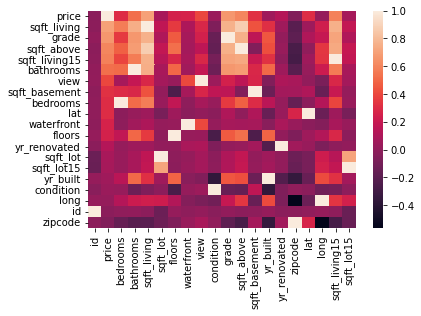

In [22]:
pricelabel='price'
cor_data_3=get_corelation(df2,pricelabel)

In [23]:
wanted=cor_data_3.keys().tolist()[1:11]
for i in range(10):
  X_train, X_test, y_train, y_test=train_test_split_selected_attributes(df2,pricelabel,wanted)
  result['select_lin_3'].append(lin_reg(X_train, X_test, y_train, y_test))
  result['select_rand_frst_3'].append(rand_forest_generator(X_train, X_test, y_train, y_test))
  result['select_GBR_3'].append(GBR(X_train, X_test, y_train, y_test))
  X_train, X_test, y_train, y_test=train_test_split_all_attributes(df2,pricelabel,[])
  result['all_lin_3'].append(lin_reg(X_train, X_test, y_train, y_test))
  result['all_rand_frst_3'].append(rand_forest_generator(X_train, X_test, y_train, y_test))
  result['all_GBR_3'].append(GBR(X_train, X_test, y_train, y_test))

In [24]:
result

{'all_GBR_1': [0.7330983650643255,
  0.7566145421462108,
  0.7310785308224369,
  0.7104276101095164,
  0.7112882453597424,
  0.7505033338682789,
  0.7512103568179326,
  0.6806766440831405,
  0.7524709547076232,
  0.7329499542827236],
 'all_GBR_2': [0.9158696519870676,
  0.8574285055859591,
  0.8239306395900069,
  0.8293287484438101,
  0.7958368972602653,
  0.8259226138153055,
  0.8273474458399606,
  0.8534387678780493,
  0.8283476243708281,
  0.8049598453523437],
 'all_GBR_3': [0.8899597000328567,
  0.9135316845910242,
  0.9109569502112407,
  0.8987449189387535,
  0.9095230088833242,
  0.8953786037389067,
  0.9063171589526676,
  0.8951249520782488,
  0.910948335654193,
  0.911227792037175],
 'all_lin_1': [0.5439471981137736,
  0.5118380217777905,
  0.5415251897439929,
  0.5982406131352307,
  0.4998761110214448,
  0.5040720862324589,
  0.5096170480297708,
  0.5255979813259543,
  0.5119437366736537,
  0.5330621145545718],
 'all_lin_2': [0.6744954194757005,
  0.6178032593161014,
  0.60712

In [25]:
for i in result:
  mx=max(result[i])
  result[i]=mx

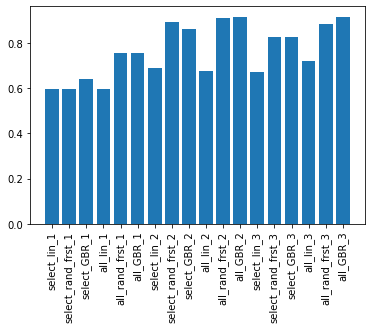

In [26]:
val=list(result.values())
keys=list(result.keys())
plt.bar(range(len(result)), val, align='center')
plt.xticks(range(len(result)), keys,rotation='vertical')
plt.show()

In [27]:
sortedrslt={k: v for k, v in sorted(result.items(), key=lambda item: item[1])}

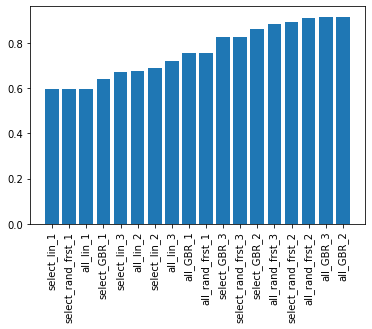

In [28]:
val=list(sortedrslt.values())
keys=list(sortedrslt.keys())
plt.bar(range(len(sortedrslt)), val, align='center')
plt.xticks(range(len(sortedrslt)), keys,rotation='vertical')
plt.show()

In [29]:
result

{'all_GBR_1': 0.7566145421462108,
 'all_GBR_2': 0.9158696519870676,
 'all_GBR_3': 0.9135316845910242,
 'all_lin_1': 0.5982406131352307,
 'all_lin_2': 0.6744954194757005,
 'all_lin_3': 0.7190576317573568,
 'all_rand_frst_1': 0.7566322439288382,
 'all_rand_frst_2': 0.9096379264826279,
 'all_rand_frst_3': 0.8856569818078088,
 'select_GBR_1': 0.6393917099162281,
 'select_GBR_2': 0.859836958715352,
 'select_GBR_3': 0.8250495796712679,
 'select_lin_1': 0.5942150729467962,
 'select_lin_2': 0.6901197165128701,
 'select_lin_3': 0.6696954848299335,
 'select_rand_frst_1': 0.5972872978645329,
 'select_rand_frst_2': 0.8909039791917104,
 'select_rand_frst_3': 0.8266006780338722}